<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/Amharic_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# reading the dataset from my drive using the above drive
dataframe1 =pd.read_excel('/content/drive/My Drive/dataset1.xlsx')
dataframe2 =pd.read_excel('/content/drive/My Drive/dataset2.xlsx')

In [105]:
dataframe1.category.unique()

array(['accident', 'agriculture', 'health', 'education', 'economy',
       'politics', 'sport'], dtype=object)

In [106]:
# merging the two dataframes
frame=[dataframe1,dataframe2]
dataframe=pd.concat(frame)

In [107]:
print(dataframe)

                                              articles   category
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident
..                                                 ...        ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education

[2181 rows x 2 columns]


In [108]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

                                              articles   category  labels
0     ግንቦት 13/2011  በተሽከርካሪ አደጋ ድንገተኛ ህክምና የተፈቀደው ሁ...   accident       0
1    ሚያዝያ  25/ 2011 የሰሜን ተራሮች ብሄራዊ ፓርክን የአደጋ ስጋቶች ለ...   accident       0
2    በደቡብ ወሎ ዞን ኩታበር ወረዳ ዛሬ በደረሰ የትራፊክ አደጋ በ11 ሰዎች ...   accident       0
3    የህዝብ ተወካዮች ምክር ቤት አባላት ዛሬ ጠዋት የተፈናቀሉ ወገኖችን ለመጎ...   accident       0
4    በባህር ዳር ከተማ ቀበሌ 05 በእሳት አደጋ ቤትና ንብረት የወደመባቸው ሰ...   accident       0
..                                                 ...        ...     ...
695  ጎባ፤ መስከረም 16/2015 (ኢዜአ) መደ ወላቡ ዩኒቨርሲቲ ተጨማሪ 13 ...  education       3
696  ባህር ዳር ሰኔ 7/2010 በአማራ ክልል ከህብረተሰቡ ከደረሱት ጥቆማዎች ...  education       3
697  አዲስ አበባ ሰኔ 29/2010 የትምህርት ጥራት ጉድለት በአገሪቱ ላይ ዘር...  education       3
698  አዲስ አበባ፤ መስከረም 15/ 2016 (ኢዜአ)፦ በተባበሩት አረብ ኤምሬቶ...  education       3
699  አዲስ አበባ መጋቢት 4/2012(ኢዜአ) ግማሽ ቢሊዮን ብር ወጪ የተደረገበ...  education       3

[2181 rows x 3 columns]


In [109]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [110]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())

314.2563044475011


In [111]:
#number of news under each categories
#accident=dataframe[dataframe['category']=='accident']
#agir=dataframe[dataframe['category']=='agriculture']
#health=dataframe[dataframe['category']=='health']
#education=dataframe[dataframe['category']=='education']
#economy=dataframe[dataframe['category']=='economy']
#politics=dataframe[dataframe['category']=='politics']
#sport=dataframe[dataframe['category']=='sport']
#print(accident.shape)
#print(agir.shape)
#print(health.shape)
#print(education.shape)
#print(economy.shape)
#print(politics.shape)
#print(sport.shape)

In [112]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
    rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
    rep5=re.sub('[ሕኅ]','ህ',rep4)
    rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
    rep7=re.sub('[ሠ]','ሰ',rep6)
    rep8=re.sub('[ሡ]','ሱ',rep7)
    rep9=re.sub('[ሢ]','ሲ',rep8)
    rep10=re.sub('[ሣ]','ሳ',rep9)
    rep11=re.sub('[ሤ]','ሴ',rep10)
    rep12=re.sub('[ሥ]','ስ',rep11)
    rep13=re.sub('[ሦ]','ሶ',rep12)
    rep14=re.sub('[ዓኣዐ]','አ',rep13)
    rep15=re.sub('[ዑ]','ኡ',rep14)
    rep16=re.sub('[ዒ]','ኢ',rep15)
    rep17=re.sub('[ዔ]','ኤ',rep16)
    rep18=re.sub('[ዕ]','እ',rep17)
    rep19=re.sub('[ዖ]','ኦ',rep18)
    rep20=re.sub('[ጸ]','ፀ',rep19)
    rep21=re.sub('[ጹ]','ፁ',rep20)
    rep22=re.sub('[ጺ]','ፂ',rep21)
    rep23=re.sub('[ጻ]','ፃ',rep22)
    rep24=re.sub('[ጼ]','ፄ',rep23)
    rep25=re.sub('[ጽ]','ፅ',rep24)
    rep26=re.sub('[ጾ]','ፆ',rep25)
    rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
    rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
    rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
    rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
    rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
    rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
    rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
    rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
    rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
    rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
    rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
    rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
    rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
    rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
    rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
    rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
    rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
    rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
    rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
    rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
    rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
    rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ
    return rep48

In [113]:
# apply normalization and special characters removal
dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [114]:
# special symbol removal
dataframe['articles']=dataframe['articles'].str.replace('[^\w\s]','',regex=True)

In [115]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [116]:
print(dataframe)

                                               articles     category  labels  \
282   በአማራ ክልል በ ሺህ  ሄክታር መሬት ላይ የዘር ብዜት ስራ እየተካሄደ ነ...  agriculture       1   
479   በኦሮሚያ የጤና አገልግሎትን ተደራሽነትን ለማረጋገጥ የዘርፉ ቦርድ አባላት...       health       4   
1064  መሪዎቹ የሀዋሳ ኢንዱስትሪያል ፓርክን ሊጎበኙ ነው\n\nሀዋሳ የካቲት  ጠ...     politics       5   
1255  ጠቅላይ ሚኒስትር ዶክተር አብይ በደምቢዶሎ ከተማ ከህዝብ ጋር ውይይት ያደ...     politics       5   
507   ቡርኪናፋሶ ከኢትዮጵያ የጤና ተቋማት የጤና መዋቅርና የጤና ኤክስቴንሽን መ...       health       4   
...                                                 ...          ...     ...   
157     ጅምላ ሻጮች ቸርቻሪዎች ቡቲኮችና የመስተንግዶ ሰጪ ተቋማት የሚሳተፉበት...      economy       0   
1095  በአገር ግንባታ ሂደት ውስጥ ትልቁ ድርሻ የህዝብ ነው\n\n\nአዲስ አበባ...     politics       5   
1130  አዴፓ ከለዘብተኝነትና ከይሉኝታ ፖለቲካ ወጥቶ ለህግ መከበርና ለሰላም እየ...     politics       5   
1294  በመላው ሴቶች ጨዋታ አራት የአትሌቲክስ ውድድሮች ፍፃሜ አገኙ\n\nጂግጂጋ...        sport       6   
860   በሚዛን አማን ከተማ ያለአግባብ የተያዙ የንግድ ኮንቴይነሮች ለተተኪ ወጣቶ...      economy       2   

      word_len  
282        259  
479  

In [117]:
# train test split
from sklearn.model_selection import train_test_split
train_val_df, test_dataset = train_test_split(dataframe, test_size=0.20, random_state=42)
train_dataset, evaluation_dataset = train_test_split(train_val_df, test_size=0.10, random_state=42)
print('Training dataset shape: ', train_dataset.shape)
print('Validation dataset shape: ', evaluation_dataset.shape)
print('Testing dataset shape: ', test_dataset.shape)

Training dataset shape:  (1569, 4)
Validation dataset shape:  (175, 4)
Testing dataset shape:  (437, 4)


In [118]:
print(dataframe.head(10))

                                               articles     category  labels  \
282   በአማራ ክልል በ ሺህ  ሄክታር መሬት ላይ የዘር ብዜት ስራ እየተካሄደ ነ...  agriculture       1   
479   በኦሮሚያ የጤና አገልግሎትን ተደራሽነትን ለማረጋገጥ የዘርፉ ቦርድ አባላት...       health       4   
1064  መሪዎቹ የሀዋሳ ኢንዱስትሪያል ፓርክን ሊጎበኙ ነው\n\nሀዋሳ የካቲት  ጠ...     politics       5   
1255  ጠቅላይ ሚኒስትር ዶክተር አብይ በደምቢዶሎ ከተማ ከህዝብ ጋር ውይይት ያደ...     politics       5   
507   ቡርኪናፋሶ ከኢትዮጵያ የጤና ተቋማት የጤና መዋቅርና የጤና ኤክስቴንሽን መ...       health       4   
495   በጋምቤላ ክልል የወባ በሽታን አስቀድሞ ለመከላከል የመድሀኒት ርጭትና የአ...       health       4   
416   መቀሌ ጥቅምት  ኢትዮጵያ ውስጥ በተያዘው በጀት አመት ተጨማሪ  ወረዳዎች ...       health       4   
530   የአለም ጤና ድረጅት መረጃ እንደሚያመለክተው በአለም ላይ በየአመቱ በአማካ...       health       4   
1071  መገናኛ ብዙሀን የቻይናአፍሪካ ግንኙነትን ይበልጥ ለማጠናከር እንደ ድልድይ...     politics       5   
1151  \n\nከአስቸኳይ ጊዜ አዋጅ ኮማንድ ፖስት ሴክሬተሪያት ፅቤት የተሰጠ መግ...     politics       5   

      word_len  
282        259  
479        304  
1064       118  
1255       166  
507        209  
495        285  


In [119]:
msk = np.random.rand(len(dataframe)) < 0.8
train_dataset = dataframe[msk]
test_dataset = dataframe[~msk]

In [120]:
!pip install datasets

In [121]:
from datasets import Dataset

In [122]:
#convert format of the dataset to HuggingFace Dataset from Pandas DataFrame
test_dataset=Dataset.from_pandas(test_dataset)


In [123]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
train_dataset=Dataset.from_pandas(train_dataset)

In [124]:
#convert the format of the dataset to HuggingFace Dataset from Pandas DataFrame
evaluation_dataset=Dataset.from_pandas(evaluation_dataset)

In [125]:
#preview of the dataset after conversion
(test_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 427
})

In [126]:
print(test_dataset['labels'])

[1, 5, 4, 5, 5, 4, 1, 5, 3, 5, 5, 0, 1, 1, 3, 0, 0, 3, 4, 4, 6, 2, 6, 0, 6, 1, 1, 1, 0, 6, 2, 0, 0, 5, 1, 1, 6, 4, 6, 5, 6, 3, 2, 6, 1, 3, 6, 4, 6, 1, 0, 1, 4, 5, 5, 2, 1, 5, 1, 5, 6, 2, 4, 4, 0, 0, 2, 3, 0, 2, 4, 6, 4, 2, 1, 3, 4, 4, 4, 1, 0, 0, 4, 3, 1, 2, 2, 2, 1, 4, 0, 2, 3, 1, 3, 1, 1, 4, 1, 5, 3, 4, 2, 4, 2, 3, 1, 6, 0, 1, 0, 6, 1, 3, 0, 1, 1, 0, 5, 4, 6, 4, 3, 4, 0, 0, 1, 2, 1, 4, 2, 4, 1, 1, 6, 3, 4, 3, 0, 0, 1, 1, 1, 5, 2, 3, 4, 6, 0, 5, 6, 5, 4, 4, 1, 5, 1, 6, 4, 6, 6, 1, 6, 2, 1, 4, 3, 4, 5, 6, 0, 4, 6, 4, 4, 2, 5, 0, 6, 0, 6, 4, 1, 0, 0, 0, 6, 1, 5, 0, 6, 5, 2, 0, 0, 4, 0, 4, 4, 0, 5, 0, 6, 6, 1, 2, 1, 2, 3, 3, 0, 3, 0, 6, 3, 5, 4, 0, 4, 3, 3, 0, 1, 1, 0, 0, 4, 1, 5, 0, 0, 1, 4, 1, 4, 3, 0, 0, 1, 6, 2, 0, 3, 1, 0, 1, 0, 3, 5, 0, 4, 4, 6, 4, 2, 5, 1, 1, 4, 6, 0, 3, 5, 4, 2, 1, 0, 3, 6, 1, 1, 4, 0, 0, 1, 0, 0, 2, 2, 4, 4, 5, 0, 0, 2, 1, 2, 2, 1, 0, 1, 5, 2, 2, 6, 0, 0, 5, 4, 2, 4, 1, 3, 4, 5, 0, 0, 4, 1, 1, 0, 6, 0, 0, 3, 3, 4, 2, 5, 5, 3, 0, 2, 3, 2, 4, 5, 5, 0, 5, 4, 2, 3, 

In [127]:
(train_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 1754
})

In [128]:
(evaluation_dataset)

Dataset({
    features: ['articles', 'category', 'labels', 'word_len', '__index_level_0__'],
    num_rows: 175
})

In [129]:
#remove unnecessary column
test_dataset=test_dataset.remove_columns("__index_level_0__")
train_dataset=train_dataset.remove_columns("__index_level_0__")
evaluation_dataset=evaluation_dataset.remove_columns("__index_level_0__")

In [130]:
#combine the train and test dataset into one datset
import datasets
main_dataset= datasets.DatasetDict({
    'train': train_dataset,
    'test': test_dataset,
    'evaluate': evaluation_dataset
})

In [131]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 1754
    })
    test: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 427
    })
    evaluate: Dataset({
        features: ['articles', 'category', 'labels', 'word_len'],
        num_rows: 175
    })
})

In [132]:
# training and testing data size
training_data_size = main_dataset['train'].num_rows
testing_data_size = main_dataset['test'].num_rows
evaluation_data_size = main_dataset['evaluate'].num_rows

In [133]:
pip install transformers -U

In [134]:
from transformers import AutoTokenizer

In [135]:
#loading a tokenizer from the pretrained model
tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic")

In [136]:
#Have a tokenizer function that uses the tokenizer
def tokenize_function(data):
    return tokenizer(data["articles"], padding="max_length", truncation=True)

In [137]:
#Tokenize all the data using the mapping functionality
tokenized_datasets = main_dataset.map(tokenize_function)

Map:   0%|          | 0/1754 [00:00<?, ? examples/s]

Map:   0%|          | 0/427 [00:00<?, ? examples/s]

Map:   0%|          | 0/175 [00:00<?, ? examples/s]

In [138]:
#remove the posts column as it is no longer needed
tokenized_datasets = tokenized_datasets.remove_columns(["articles"])

In [139]:
#import torch
import torch
#import Data loader from torch
from torch.utils.data import DataLoader
#import an optimizer
from torch.optim import AdamW
#import tqdm for a progress bar
from tqdm.auto import tqdm

In [140]:
#changing the format of the tokenized dataset to torch
tokenized_datasets.set_format("torch")

In [141]:
#shuffeling and selecting the needed size of dataset for training and evaluating the model
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(training_data_size))
small_test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(testing_data_size))
small_eval_dataset = tokenized_datasets["evaluate"].shuffle(seed=42).select(range(evaluation_data_size))

In [142]:
# preview of the shuffeled and selected evaluation dataset
small_eval_dataset

Dataset({
    features: ['category', 'labels', 'word_len', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 175
})

In [143]:
train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=4)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=4)
test_dataloader = DataLoader(small_test_dataset, batch_size=4)

In [144]:
#Load auto mode classifier from the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("Davlan/bert-base-multilingual-cased-finetuned-amharic", num_labels=7)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [145]:
import torch

device = torch.device("cpu")

if torch.cuda.is_available():
   print("Training on GPU")
   device = torch.device("cuda:0")
print(device)

Training on GPU
cuda:0


In [146]:
pip install evaluate

In [147]:
import numpy as np
from evaluate import load
metric = load("f1","accuracy")

In [148]:

#def compute_metrics(eval_pred):
 #   logits, labels = eval_pred
#    predictions = np.argmax(logits, axis=-1)
 #   return metric.compute(predictions=predictions, references=labels, average="weighted")

In [149]:
! pip install -U accelerate
! pip install -U transformers

In [150]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="test_trainer")

In [151]:
import accelerate
accelerate.__version__

'0.34.2'

In [152]:
from transformers import TrainingArguments, Trainer
from transformers import EarlyStoppingCallback, IntervalStrategy

In [153]:
def custom_metrics(eval_pred):
    metric1 = load("precision")
    metric2 = load("recall")
    metric3 = load("f1")
    metric4 = load("accuracy")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision = metric1.compute(predictions=predictions, references=labels, average="weighted")["precision"]
    recall = metric2.compute(predictions=predictions, references=labels, average="weighted")["recall"]
    f1 = metric3.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    accuracy = metric4.compute(predictions=predictions, references=labels)["accuracy"]

    return {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy}

In [154]:
# #load an optimizer
# optimizer = AdamW(model.parameters(), lr=5e-5)
training_args = TrainingArguments(
   f"training_with_callbacks",
   eval_strategy='epoch',
   save_strategy='epoch',
   num_train_epochs=10,
   learning_rate=1e-5,
   per_device_train_batch_size=4,  # batch size per device during training
   per_device_eval_batch_size=8,   # batch size for evaluation
   warmup_steps=1000,                # number of warmup steps for learning rate
   weight_decay=0.01,
   run_name="Amharic news document",# strength of weight decay
   logging_dir='./logs',            # directory for storing logs
   logging_steps=20,
   load_best_model_at_end= True,

   )

In [155]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=custom_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=10)],
)

In [156]:
import torch
torch.cuda.empty_cache()


In [157]:
 train_result=trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.511400,1.187435,0.724041,0.668571,0.627924,0.668571


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.511400,1.187435,0.724041,0.668571,0.627924,0.668571
2,0.607500,0.557200,0.825906,0.817143,0.812797,0.817143
3,0.324100,0.447279,0.860000,0.851429,0.852607,0.851429
4,0.304400,0.203832,0.923013,0.920000,0.920022,0.920000
5,0.264400,0.135088,0.971701,0.971429,0.971406,0.971429
6,0.017800,0.126327,0.971701,0.971429,0.971460,0.971429
7,0.105300,0.149048,0.971817,0.971429,0.971401,0.971429
8,0.162200,0.155736,0.968827,0.965714,0.965641,0.965714
9,0.182700,0.172471,0.968192,0.965714,0.966074,0.965714
10,0.004100,0.134647,0.971817,0.971429,0.971401,0.971429


In [161]:
pip install --upgrade transformers

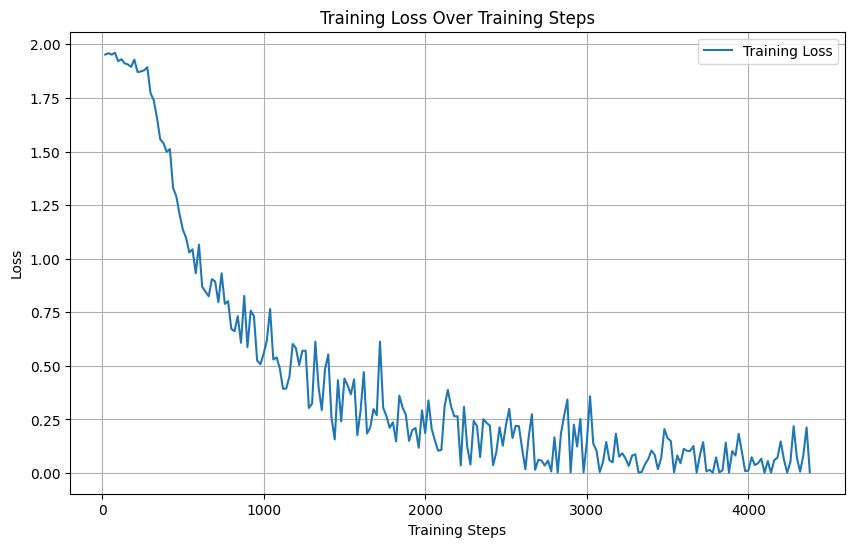

In [205]:
train_losses = []
steps = []
# Extract eval_loss and corresponding steps
for log_dict in trainer.state.log_history:
    if 'loss' in log_dict:
        train_losses.append(log_dict['loss'])
        steps.append(log_dict['step'])
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, train_losses, label='Training Loss')
# Customize the plot
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss Over Training Steps')
plt.legend()
plt.grid(True)
# Display the plot
plt.show()

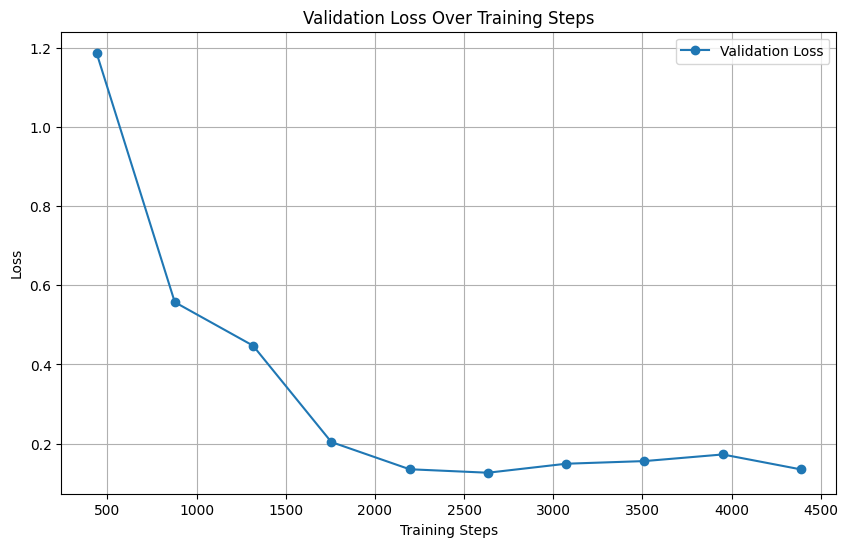

In [206]:
# Extract eval_loss and corresponding steps
eval_losses = []
steps = []

for log in trainer.state.log_history:
    if 'eval_loss' in log:
        eval_losses.append(log['eval_loss'])
        steps.append(log['step'])  # Assuming 'step' contains the training step number

# Check if we have data to plot
if not eval_losses:
    print("No evaluation losses found.")
else:
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot eval_loss against steps
    plt.plot(steps, eval_losses, marker='o', label='Validation Loss')

    # Customize the plot
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Validation Loss Over Training Steps')
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

In [180]:

from sklearn.metrics import confusion_matrix
# Now you can make predictions
predictions = trainer.predict(small_test_dataset)

# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels =  small_test_dataset['labels']
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

[[73  4  0  2  1  0  1]
 [ 8 56  9  1  4  0  0]
 [ 0  4 39  2  1  4  2]
 [ 1  0  0 48  1  0  0]
 [ 0  0  1  5 70  0  0]
 [ 0  0  7  2  0 37  0]
 [ 1  0  0  1  0  0 42]]


In [208]:
#overall performance of the fine-tuned BERT model on Amharic new classification
trainer.evaluate(small_test_dataset)

{'eval_loss': 0.8320069313049316,
 'eval_precision': 0.8588273600569469,
 'eval_recall': 0.8548009367681498,
 'eval_f1': 0.8539266791248326,
 'eval_accuracy': 0.8548009367681498,
 'eval_runtime': 13.9051,
 'eval_samples_per_second': 30.708,
 'eval_steps_per_second': 3.883,
 'epoch': 10.0}

# New Section